## Notes and observations about the data 
* Lots of cases where the person hasn't consumed weed in the last 30 days but is still a strong/medium/light consumer - so essentially, Marijuana_consumer_last30 is not a strong indicator of user/non user
* T-Test on users vs non users for days of workout shows non significant difference

## Data Cleaning

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [298]:
survey_data = pd.read_csv('data/uw_survey_may31_4_30pm.csv')

In [299]:
# survey_data.head()
survey_data.columns

Index(['Timestamp', 'What is your age', 'Which gender do you identify with?',
       'What is your major?',
       'Have you consumed marijuana (smoke, edibles, drinks etc.) in last 30 days?',
       'In the last 30 days, how many days a week have you consumed marijuana?',
       'Do you consider yourself to be a:',
       'In the last 30 days, how many days a week did you workout/exercise?',
       'In the last 30 days, did you attempt to do any school related work (study, complete assignments etc) under the influence of marijuana?',
       'How do you think marijuana consumption affects your state of mind (select none if not a user)  - It makes it ',
       'Under the influence of Marijuana do you feel like consuming any of the following substances (check all that apply) ',
       'Do you ever experience any of the following instabilities mentally or emotionally?',
       'Do you use marijuana to combat these mental health issues?',
       'Have you considered using other recreationa

In [300]:
# change column names for ease of access
names = ['Timestamp', 'Age', 'Sex', 'Major', 'Marijuana_consumer_last30',
                       'days_per_week', 'user_type', 'workout', 'school_work', 'state_of_mind',
                      'other_drug_consumption', 'mental_health', 'weed_to_mental', 'other_drug_ease']
survey_data.columns = names
# removing row with gender  == chimpanzee
survey_data = survey_data[survey_data.Sex  != 'Chimpanzee']
survey_data.reset_index(inplace=True)

In [370]:
survey_data.head()

,index,Timestamp,Age,Sex,Major,Marijuana_consumer_last30,days_per_week,user_type,workout,school_work,state_of_mind,other_drug_consumption,mental_health,weed_to_mental,other_drug_ease
0,0,2019/05/29 5:00:48 PM MDT,20,Female,Physics,Yes,1,Light consumer,0,No,"Depends on the strain, alternate between paran...",Just food,Anxiety,No,Yes
1,1,2019/05/29 5:01:04 PM MDT,17,Female,Computer Science,No,0,None,4,No,accidentally clicked on a button,none,Other,No,No
2,2,2019/05/29 5:03:18 PM MDT,20,Male,Computer Science,No,0,None,7,No,Probably like alcohol,NaN,Other,No,No
3,3,2019/05/29 5:03:24 PM MDT,30,Female,Business,Yes,1,Light consumer,4,Yes,Relaxed,Alcohol,Anxiety;Stress;Depression,Yes,No
4,4,2019/05/29 5:03:39 PM MDT,21,Male,Not Specified,Yes,3,Light consumer,1,Yes,Paranoid,Nicotine,Anxiety;Stress;Depression,Yes,Yes


In [307]:
# Changing not specified major type from nan to 'None' for future processing
for index, major in enumerate(survey_data.Major):
    if type(major) is float:
        survey_data.Major[index] = 'None'



In [419]:
# mapping for majors
major_mapping = {
    'Computer Science' : ['computer science', 'cse', 'cs', 'cs + math', 'computer science '
                          , 'computer science & software engineering', 'cee', 'computer engineering'
                         ],
    'Business' : ['business' , 'business; informatics', 'Marketing','business admin', 'business/lsj',
                 'business administration ', 'business administration', 'accounting and information systems',
                 'business and sociology', 'accounting', 'accounting ', 'business ', 'marketing', 'mba'],
    
    'Informatics' : ['info ', 'informatics ', 'informatics intended ', 'intended informatics', 'informatics', 'info',
                     'infortmatics','pre-info','informatics, spanish', 'informatics, chid major'],
    
    'Not Specified' : ['none', 'undecided', 'pre-science', 'dude idek', 'pre-major', 'pre sciences'],
    'Psychology' : ['psychology', 'psychology / speech & hearing sciences'],
    'Communications' : ['comm', 'communication/psychology', 'com', 'journalism', 'communications '],
    'chemistry' : ['chemistry'],
    'Physics' : ['physocs', 'applied physics', 'physics'],
    'Electrical Engineering' : ['electrical engineering'],
    'Unspecified Engineering' : ['engineering', 'engineering ','ece', 'industrial and systems engineering', 'industrial engineering'],
    'Biology' : ['biology mcd', 'biology', 'biology ', 'biochemistry', 'biology or biochemistry','bio', 'bio ',
                 'molecular cellular developmental biology', 'biology mcd', 'bioengineering', 
                 'bioengineering and computer science', 'biology or biochemistry ', 'mcd biology'],
    'History'  : ['history & hcde', 'history'],
    'Math' : ['mathematics'],
    'Economics' : ['econ', 'economics', 'hopefully econ'],
    'Environmental Studies' : ['environmental studies', 'environmental studies ', 'environmental health', 'environmental health '],
    'Political Science' : ['political science ', 'political science & communications', 'political science',  'political science ' ,'political economics '],
    'Others' : ['american ethnic studies', 'atmospheric science ', 'chid', 'ess', 'english and jsis yuh tuh wuh', 'esrm', 'ethnomusicology', 'gis', 'geography', 
                'hcde', 'intended statistics', 'international studies', 'jsis ', 'jsis & lsj', 'lsj', 'law, societies, and justice ', 'music education', 'nursing',
                'physiology ', 'psychology ', 'public health', 'public health global health', 'social work', 'statistics', 'women’s studies', 'nursing', 'psychology & philosophy ']
}


stem_mapping = {
    "non-stem" : ['Business', 'Communications', 'Political Science', 'Others', 'History'],
    "stem" : ['Biology', 'Environmental Studies', 'Math', 'Computer Science', 'Informatics', 'Psychology', 'chemistry', 'Physics', 'Electrical Engineering','Unspecified Engineering']
}

In [311]:
# mapping raw major name to specified category
for i in range(0, len(survey_data)) :
    current_major = survey_data.Major[i]
    for key in major_mapping.keys():
        if current_major.lower() in major_mapping[key]:
            survey_data.Major[i] = key
        



/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [426]:
stem_or_not = []
for major in survey_data.Major:
    if major in stem_mapping['stem']:
        stem_or_not.append(1)
    elif major in stem_mapping['non-stem']:
        stem_or_not.append(0)
    else:
        stem_or_not.append(99)
survey_data['stem'] = stem_or_not

In [398]:
# Changing not specified major type from nan to 'None' for future processing
for index, mental in enumerate(survey_data.mental_health):
    if type(mental) is float:
        survey_data.mental_health[index] = 'None'



/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [313]:
survey_data.head()

,index,Timestamp,Age,Sex,Major,Marijuana_consumer_last30,days_per_week,user_type,workout,school_work,state_of_mind,other_drug_consumption,mental_health,weed_to_mental,other_drug_ease
0,0,2019/05/29 5:00:48 PM MDT,20,Female,Physics,Yes,1,Light consumer,0,No,"Depends on the strain, alternate between paran...",Just food,Anxiety,No,Yes
1,1,2019/05/29 5:01:04 PM MDT,17,Female,Computer Science,No,0,None,4,No,accidentally clicked on a button,none,Other,No,No
2,2,2019/05/29 5:03:18 PM MDT,20,Male,Computer Science,No,0,None,7,No,Probably like alcohol,NaN,Other,No,No
3,3,2019/05/29 5:03:24 PM MDT,30,Female,Business,Yes,1,Light consumer,4,Yes,Relaxed,Alcohol,Anxiety;Stress;Depression,Yes,No
4,4,2019/05/29 5:03:39 PM MDT,21,Male,Not Specified,Yes,3,Light consumer,1,Yes,Paranoid,Nicotine,Anxiety;Stress;Depression,Yes,Yes


In [314]:
survey_data.columns

Index(['index', 'Timestamp', 'Age', 'Sex', 'Major',
       'Marijuana_consumer_last30', 'days_per_week', 'user_type', 'workout',
       'school_work', 'state_of_mind', 'other_drug_consumption',
       'mental_health', 'weed_to_mental', 'other_drug_ease'],
      dtype='object')

In [444]:
survey_data.groupby('Major').count()

,index,Timestamp,Age,Sex,Marijuana_consumer_last30,days_per_week,user_type,workout,school_work,state_of_mind,other_drug_consumption,mental_health,weed_to_mental,other_drug_ease,stem
Major,,,,,,,,,,,,,,,
Biology,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
Business,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
Communications,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Computer Science,25,25,25,25,25,25,25,25,25,25,21,25,23,23,25
Economics,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Electrical Engineering,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Environmental Studies,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
History,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Informatics,37,37,37,37,37,37,37,37,37,37,36,37,36,36,37


## Analysis

In [428]:
user = survey_data[survey_data.Marijuana_consumer_last30 == 'Yes']
non_user = survey_data[survey_data.Marijuana_consumer_last30 == 'No']
heavy_user = survey_data[survey_data.days_per_week >= 6]

In [342]:
# %age of weed consumers
len(user)/len(survey_data)

0.6517412935323383

In [343]:
# %age of non consumers
len(non_user)/len(survey_data)

0.3482587064676617

In [344]:
np.mean(user.workout)

2.954198473282443

In [345]:
np.mean(non_user.workout)

2.7714285714285714

In [338]:
# P-Value = 0.69, pretty high, cannot reject null hypothesis, difference in mean is not significant
stats.ttest_ind(non_user.workout,user.workout)

Ttest_indResult(statistic=0.3968189517607687, pvalue=0.69192620272376226)

In [339]:
# average days per week and days of workout for types of marijuana users
survey_data.groupby(['user_type']).mean()

,index,Age,days_per_week,workout
user_type,,,,
Heavy consumer,106.923077,20.846154,6.038462,2.846154
Light consumer,98.189189,20.540541,1.229730,2.540541
Moderate consumer,99.708333,20.312500,3.750000,3.333333
None,102.716981,20.132075,0.000000,3.000000


In [347]:
# P-Value = 0.34, pretty high, cannot reject null hypothesis, difference in mean is not significant
stats.ttest_ind(non_user.workout, heavy_user.workout)

Ttest_indResult(statistic=-0.95774975168063925, pvalue=0.34052204563360189)

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


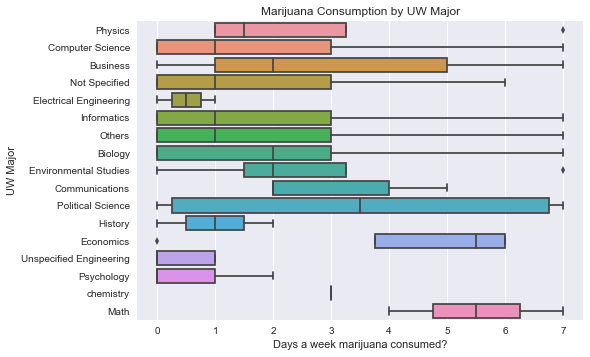

In [507]:
ax =sns.boxplot("days_per_week","Major",  data=survey_data)
ax.set(xlabel='Days a week marijuana consumed?', ylabel='UW Major', title='Marijuana Consumption by UW Major')
plt.savefig('Survey_Visualizations/consumption_by_major.png', bbox_inches='tight')
plt.show()


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


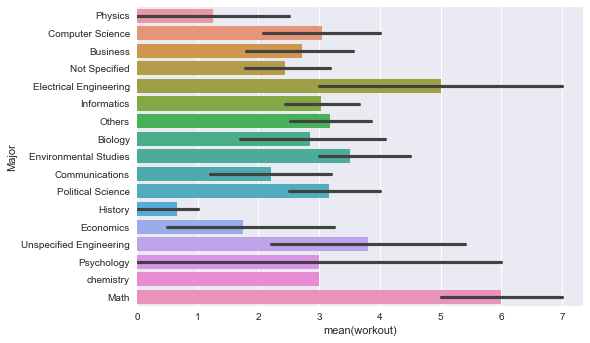

In [365]:
ax =sns.barplot("workout","Major",  data=survey_data)
ax.set(xlabel='Days a week marijuana consumed', ylabel='UW Major', title='Marijuana Consumption by UW Major')

plt.show()


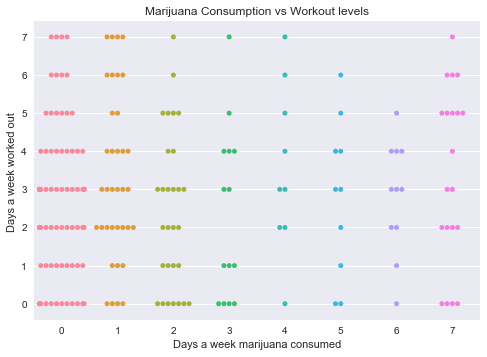

In [466]:
ax = sns.swarmplot("days_per_week", 'workout', data=survey_data)
ax.set(xlabel='Days a week marijuana consumed', ylabel='Days a week worked out ', title='Marijuana Consumption vs Workout levels')
plt.savefig('Survey_Visualizations/consumption_vs_workout_swarmplot.png', bbox_inches='tight')
plt.show()

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


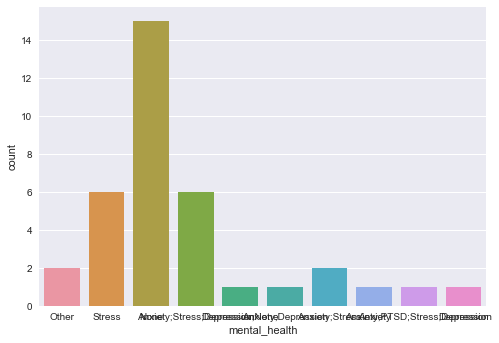

In [359]:
ax = sns.countplot(survey_data[survey_data.Major == 'Informatics'].mental_health)
plt.show()

In [379]:
info = survey_data[survey_data.Major == 'Informatics']
business = survey_data[survey_data.Major == 'Business']
not_specified = survey_data[survey_data.Major == 'Not Specified']

In [380]:
len(not_specified)

27

In [373]:
len(business)

25

In [381]:
np.mean(info.days_per_week)

1.8918918918918919

In [375]:
np.mean(business.days_per_week)

2.68

In [382]:
stats.ttest_ind(not_specified.days_per_week, info.days_per_week)

Ttest_indResult(statistic=-0.38363102550965883, pvalue=0.70256435091437774)

In [385]:
stats.ttest_ind(not_specified.workout, info.workout)

Ttest_indResult(statistic=-1.2065307628376991, pvalue=0.23219652210089353)

In [386]:
len(user)

131

In [387]:
len(non_user)

70

In [437]:
len(user[user.mental_health.str.contains('Stress')])
# len(user[user.mental_health.str.contains('None')]) + len(user[user.mental_health.str.contains('None')])


71

In [410]:
len(non_user[non_user.mental_health.str.contains('Anxiety')])
# len(non_user[non_user.mental_health.str.contains('None')])


27

In [411]:
survey_data.mental_health.unique()

array(['Anxiety', 'Other', 'Anxiety;Stress;Depression',
       'Anxiety;PTSD;Stress', 'Stress', 'Anxiety;Stress',
       'Stress;Depression', 'None', 'Depression', 'Anxiety;Depression',
       'Anxiety;PTSD', 'Depression;None', 'Anxiety;PTSD;Stress;Depression',
       'PTSD;Stress', 'Depression;Other', 'Anxiety;Other'], dtype=object)

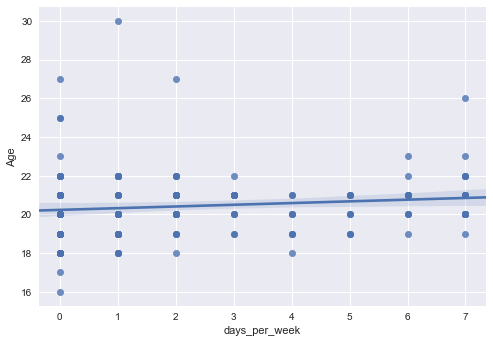

In [412]:
ax = sns.regplot("days_per_week", 'Age', data=survey_data)
plt.show()

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


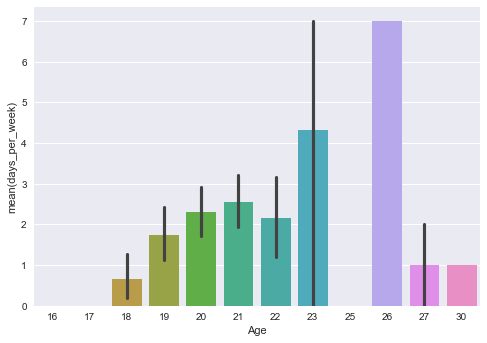

In [414]:
ax =sns.barplot("Age","days_per_week",  data=survey_data)
ax.set(xlabel='Days a week marijuana consumed', ylabel='Days a week worked out ', title='Marijuana Consumption vs Workout levels')

plt.savefig('Survey_Visualizations/consumption_by_major.png', bbox_inches='tight')

plt.show()

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


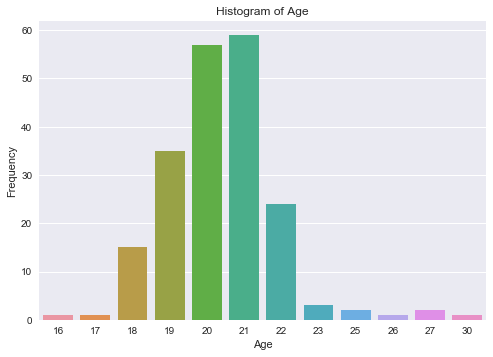

In [467]:

ax = sns.countplot(survey_data.Age)
ax.set(xlabel='Age', ylabel='Frequency', title='Histogram of Age')
plt.savefig('Survey_Visualizations/Histogram_of_Age.png', bbox_inches='tight')

plt.show()

In [445]:
len(survew[non_user.stem == 1])
# len(user[user.mental_health.str.contains('None')]) + len(user[user.mental_health.str.contains('None')])


37

In [451]:
(survey_data[survey_data.stem == 1])

,index,Timestamp,Age,Sex,Major,Marijuana_consumer_last30,days_per_week,user_type,workout,school_work,state_of_mind,other_drug_consumption,mental_health,weed_to_mental,other_drug_ease,stem
0,0,2019/05/29 5:00:48 PM MDT,20,Female,Physics,Yes,1,Light consumer,0,No,"Depends on the strain, alternate between paran...",Just food,Anxiety,No,Yes,1
1,1,2019/05/29 5:01:04 PM MDT,17,Female,Computer Science,No,0,None,4,No,accidentally clicked on a button,none,Other,No,No,1
2,2,2019/05/29 5:03:18 PM MDT,20,Male,Computer Science,No,0,None,7,No,Probably like alcohol,NaN,Other,No,No,1
5,5,2019/05/29 5:04:00 PM MDT,22,Male,Electrical Engineering,Yes,1,Light consumer,3,No,Relaxed,None,Anxiety;Stress;Depression,No,No,1
6,6,2019/05/29 5:05:45 PM MDT,21,Male,Informatics,No,0,None,4,No,Inattentive,None,Other,No,No,1
9,9,2019/05/29 5:07:06 PM MDT,22,Male,Informatics,No,0,Light consumer,3,No,Relaxed,none,Stress,No,No,1
11,11,2019/05/29 5:08:40 PM MDT,22,Male,Informatics,No,0,None,5,No,Relaxed,Nicotine;Alcohol;Tobacco,Other,No,Yes,1
13,13,2019/05/29 5:10:35 PM MDT,21,Male,Computer Science,Yes,3,Moderate consumer,0,No,All of the above depending on the state of my ...,None,Other,No,No,1
14,14,2019/05/29 5:11:33 PM MDT,20,Male,Computer Science,Yes,2,Light consumer,0,No,Relaxed,Food,Stress;Depression,No,No,1
15,15,2019/05/29 5:11:42 PM MDT,20,Male,Computer Science,No,0,None,3,No,None,None,None,No,No,1


In [454]:
survey_data[survey_data.stem == 0].days_per_week

3      1
7      0
8      1
10     7
12     2
18     2
23     3
27     0
30     1
32     2
34     0
35     0
36     7
37     1
39     2
41     3
43     4
46     7
48     0
58     6
60     0
62     6
66     3
69     1
73     1
75     0
77     0
78     0
79     4
81     2
      ..
109    2
110    2
115    5
116    0
117    1
123    2
126    7
131    7
132    0
136    1
137    5
138    0
140    6
141    0
143    7
144    4
148    4
151    5
153    2
156    1
158    6
162    1
166    1
168    1
172    1
175    0
176    0
183    0
186    1
189    6
Name: days_per_week, Length: 74, dtype: int64

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


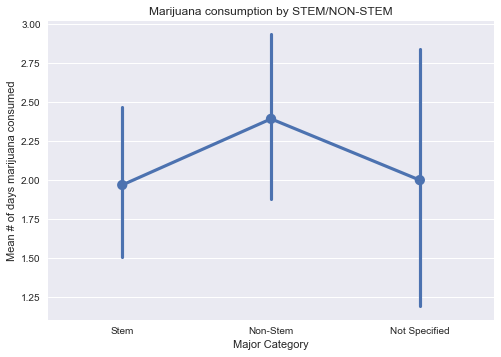

In [510]:
# li = []
# for stem in survey_data.stem:
#     if stem == 0:
#         li.append('Non-Stem')
#     elif stem == 1:
#         li.append('Stem')
#     else:
#         li.append('Not Specified')
# survey_data['stem_no'] = li    

ax = sns.pointplot('stem_no', 'days_per_week',data=survey_data)
ax.set(xlabel='Major Category', ylabel='Mean # of days marijuana consumed', title='Marijuana consumption by STEM/NON-STEM')
# plt.savefig('Survey_Visualizations/Marijuana_consumption_by_STEM_NON-STEM.png', bbox_inches='tight')
plt.show()



/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


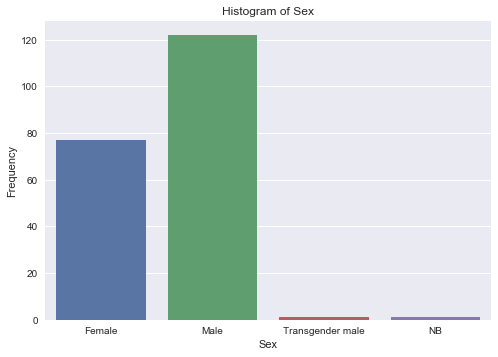

In [500]:

ax = sns.countplot(survey_data.Sex)
ax.set(xlabel='Sex', ylabel='Frequency', title='Histogram of Sex')
plt.savefig('Survey_Visualizations/Histogram_of_Gender.png', bbox_inches='tight')

plt.show()

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


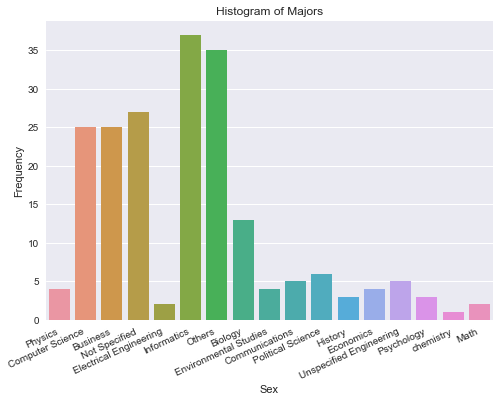

In [501]:

ax = sns.countplot(survey_data.Major)
ax.set(xlabel='Sex', ylabel='Frequency', title='Histogram of Majors')
plt.xticks(rotation=25,ha="right")
plt.savefig('Survey_Visualizations/Histogram_of_Majors.png', bbox_inches='tight')

plt.show()

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


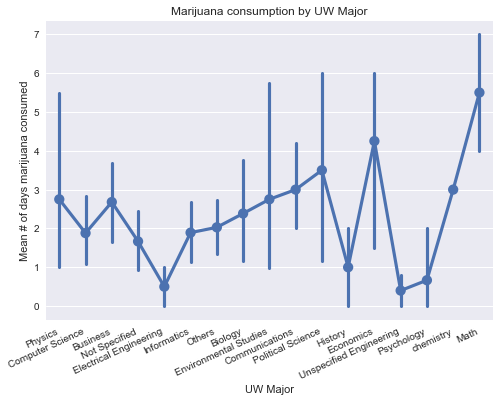

In [505]:
ax = sns.pointplot('Major', 'days_per_week',data=survey_data)
ax.set(xlabel='UW Major', ylabel='Mean # of days marijuana consumed', title='Marijuana consumption by UW Major')
plt.xticks(rotation=25,ha="right")

plt.savefig('Survey_Visualizations/Marijuana_consumption_by_major_lineplot.png', bbox_inches='tight')
plt.show()

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


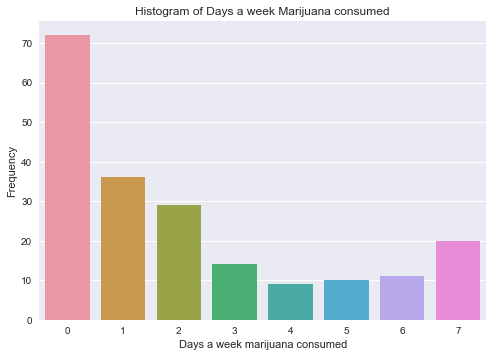

In [513]:

ax = sns.countplot(survey_data.days_per_week)
ax.set(xlabel='Days a week marijuana consumed', ylabel='Frequency', title='Histogram of Days a week Marijuana consumed')
plt.savefig('Survey_Visualizations/days_a_week_consumed.png', bbox_inches='tight')

plt.show()

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


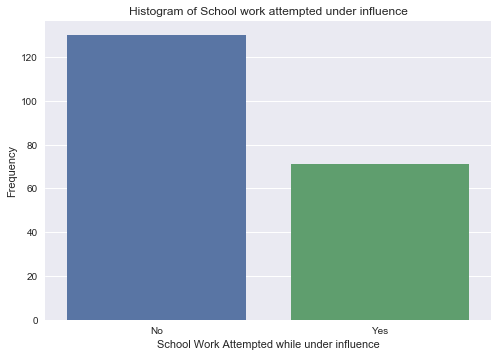

In [515]:

ax = sns.countplot(survey_data.school_work)
ax.set(xlabel='School Work Attempted while under influence', ylabel='Frequency', title='Histogram of School work attempted under influence')
plt.savefig('Survey_Visualizations/Histogram_of_school_work_under_influence.png', bbox_inches='tight')

plt.show()